# Python Exercise : KNN

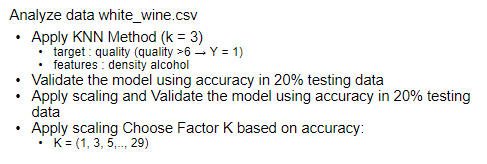

In [1]:
import pandas as pd
import numpy as np

In [2]:
wine = pd.read_csv('../../data/white_wine.csv')
wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.0              0.27         0.36            20.7      0.045   
1              6.3              0.30         0.34             1.6      0.049   
2              8.1              0.28         0.40             6.9      0.050   
3              7.2              0.23         0.32             8.5      0.058   
4              7.2              0.23         0.32             8.5      0.058   
..             ...               ...          ...             ...        ...   
515            6.1              0.31         0.26             2.2      0.051   
516            6.8              0.18         0.37             1.6      0.055   
517            7.4              0.15         0.42             1.7      0.045   
518            5.9              0.13         0.28             1.9      0.050   
519            7.2              0.34         0.34            12.6      0.048   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   45.0                 170.0   1.0010  3.00       0.45   
1                   14.0                 132.0   0.9940  3.30       0.49   
2                   30.0                  97.0   0.9951  3.26       0.44   
3                   47.0                 186.0   0.9956  3.19       0.40   
4                   47.0                 186.0   0.9956  3.19       0.40   
..                   ...                   ...      ...   ...        ...   
515                 28.0                 167.0   0.9926  3.37       0.47   
516                 47.0                 154.0   0.9934  3.08       0.45   
517                 49.0                 154.0   0.9920  3.00       0.60   
518                 20.0                  78.0   0.9918  3.43       0.64   
519                  7.0                  41.0   0.9940   NaN        NaN   

     alcohol  quality  
0        8.8      6.0  
1        9.5      6.0  
2       10.1      6.0  
3        9.9      6.0  
4        9.9      6.0  
..       ...      ...  
515     10.4      6.0  
516      9.1      5.0  
517     10.4      6.0  
518     10.8      6.0  
519      NaN      NaN  

[520 rows x 12 columns]

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
wine['label'] = np.where(wine['quality']>6, 1, 0)

In [5]:
wine.head(1)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   

   alcohol  quality  label  
0      8.8      6.0      0

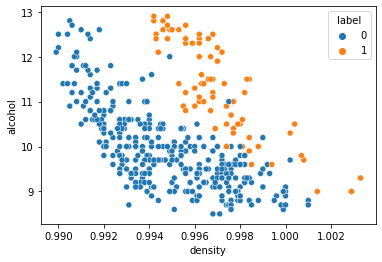

In [8]:
sns.scatterplot(x = 'density', y = 'alcohol', data = wine, hue='label')
plt.show()

In [9]:
wine[['alcohol', 'density']].isna().sum()

alcohol    1
density    0
dtype: int64

In [10]:
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True)

In [11]:
wine[['alcohol', 'density']].isna().sum()

alcohol    0
density    0
dtype: int64

In [12]:
X = wine[['alcohol', 'density']]
y = wine['label']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=2020
)

> ## W/o Scaling

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [20]:
print('Accuracy score:', accuracy_score(y_test, y_pred))

Accuracy score: 0.9038461538461539


> ## W/ Scaling

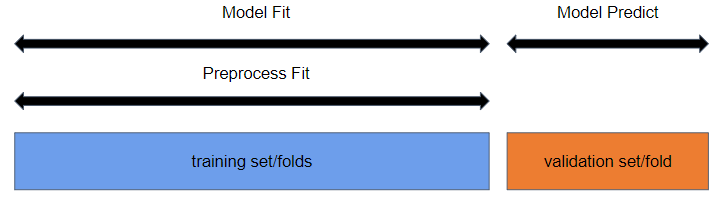

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled[:5]

array([[0.45454545, 0.34586466],
       [0.11363636, 0.36842105],
       [0.11363636, 0.96992481],
       [0.13636364, 0.46616541],
       [0.43181818, 0.34586466]])

In [26]:
X_train.head()

alcohol  density
325     10.5   0.9946
273      9.0   0.9949
287      9.0   1.0029
342      9.1   0.9962
323     10.4   0.9946

In [27]:
X_train.describe()

alcohol     density
count  416.000000  416.000000
mean    10.106056    0.995420
std      1.075572    0.002634
min      8.500000    0.990000
25%      9.300000    0.993400
50%      9.900000    0.995400
75%     10.700000    0.997400
max     12.900000    1.003300

In [43]:
knn_scaled = KNeighborsClassifier(n_neighbors=3, p=2)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

In [44]:
print('Accuracy score :', accuracy_score(y_test, y_pred_scaled))

Accuracy score : 0.9807692307692307


In [45]:
def make_conf_matrix(confusion):
    tn, fp, fn, tp = confusion.flatten()
    conf_df = pd.DataFrame({'p_0': [tn, fn, tn+fn], 'p_1': [fp, tp, fp+tp], 'total_actual': [tn+fp, fn+tp, tn+fn+tp+fp]},
                           index=['a_0', 'a_1', 'total_prediction'])
    return conf_df

In [46]:
make_conf_matrix(confusion_matrix(y_test, y_pred))

p_0  p_1  total_actual
a_0                79    5            84
a_1                 5   15            20
total_prediction   84   20           104

In [47]:
make_conf_matrix(confusion_matrix(y_test, y_pred_scaled))

p_0  p_1  total_actual
a_0                83    1            84
a_1                 1   19            20
total_prediction   84   20           104

The accuracy improved from 0.9038 to 0.9876 after we applied scaling.

> ## Choose Factor K

In [48]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train_scaled, y_train)
    
    y_pred_train = knn_i.predict(X_train_scaled)
    training_accuracies.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = knn_i.predict(X_test_scaled)
    acc_score = accuracy_score(y_test, y_pred_test)
    testing_accuracies.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i

In [52]:
[testing_accuracies, training_accuracies]

[[0.9711538461538461,
  0.9807692307692307,
  0.9807692307692307,
  0.9711538461538461,
  0.9807692307692307,
  0.9807692307692307,
  0.9711538461538461,
  0.9711538461538461,
  0.9903846153846154,
  0.9807692307692307,
  0.9807692307692307,
  0.9807692307692307,
  0.9807692307692307,
  0.9807692307692307,
  0.9807692307692307],
 [0.9975961538461539,
  0.9831730769230769,
  0.9759615384615384,
  0.9711538461538461,
  0.9807692307692307,
  0.9759615384615384,
  0.9783653846153846,
  0.9735576923076923,
  0.9639423076923077,
  0.9567307692307693,
  0.9519230769230769,
  0.9519230769230769,
  0.9471153846153846,
  0.9423076923076923,
  0.9399038461538461]]

C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\R7891\Anaconda3\

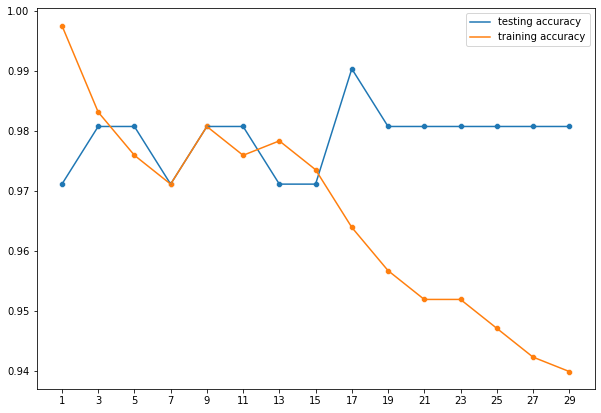

In [53]:
plt.figure(figsize=(10,7))
sns.lineplot(k, testing_accuracies)
sns.scatterplot(k, testing_accuracies)
sns.lineplot(k, training_accuracies)
sns.scatterplot(k, training_accuracies)
plt.legend(['testing accuracy', 'training accuracy'])
plt.xticks(list(k))
plt.show()

In [54]:
print('best k:', best_k)
print('accuracy:', score)

best k: 17
accuracy: 0.9903846153846154


The best factor k for this case is 17 with 99.03 % accuracy. The performance improved again from 98.76% accuracy to 99.03% accuracy.

In [55]:
print(classification_report(y_test, y_pred_scaled))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        84
           1       0.95      0.95      0.95        20

    accuracy                           0.98       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.98      0.98      0.98       104

